# K-NN Classification

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Part 1) Before Data or Feature Engineering

In [2]:
#import dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Visualize the Data

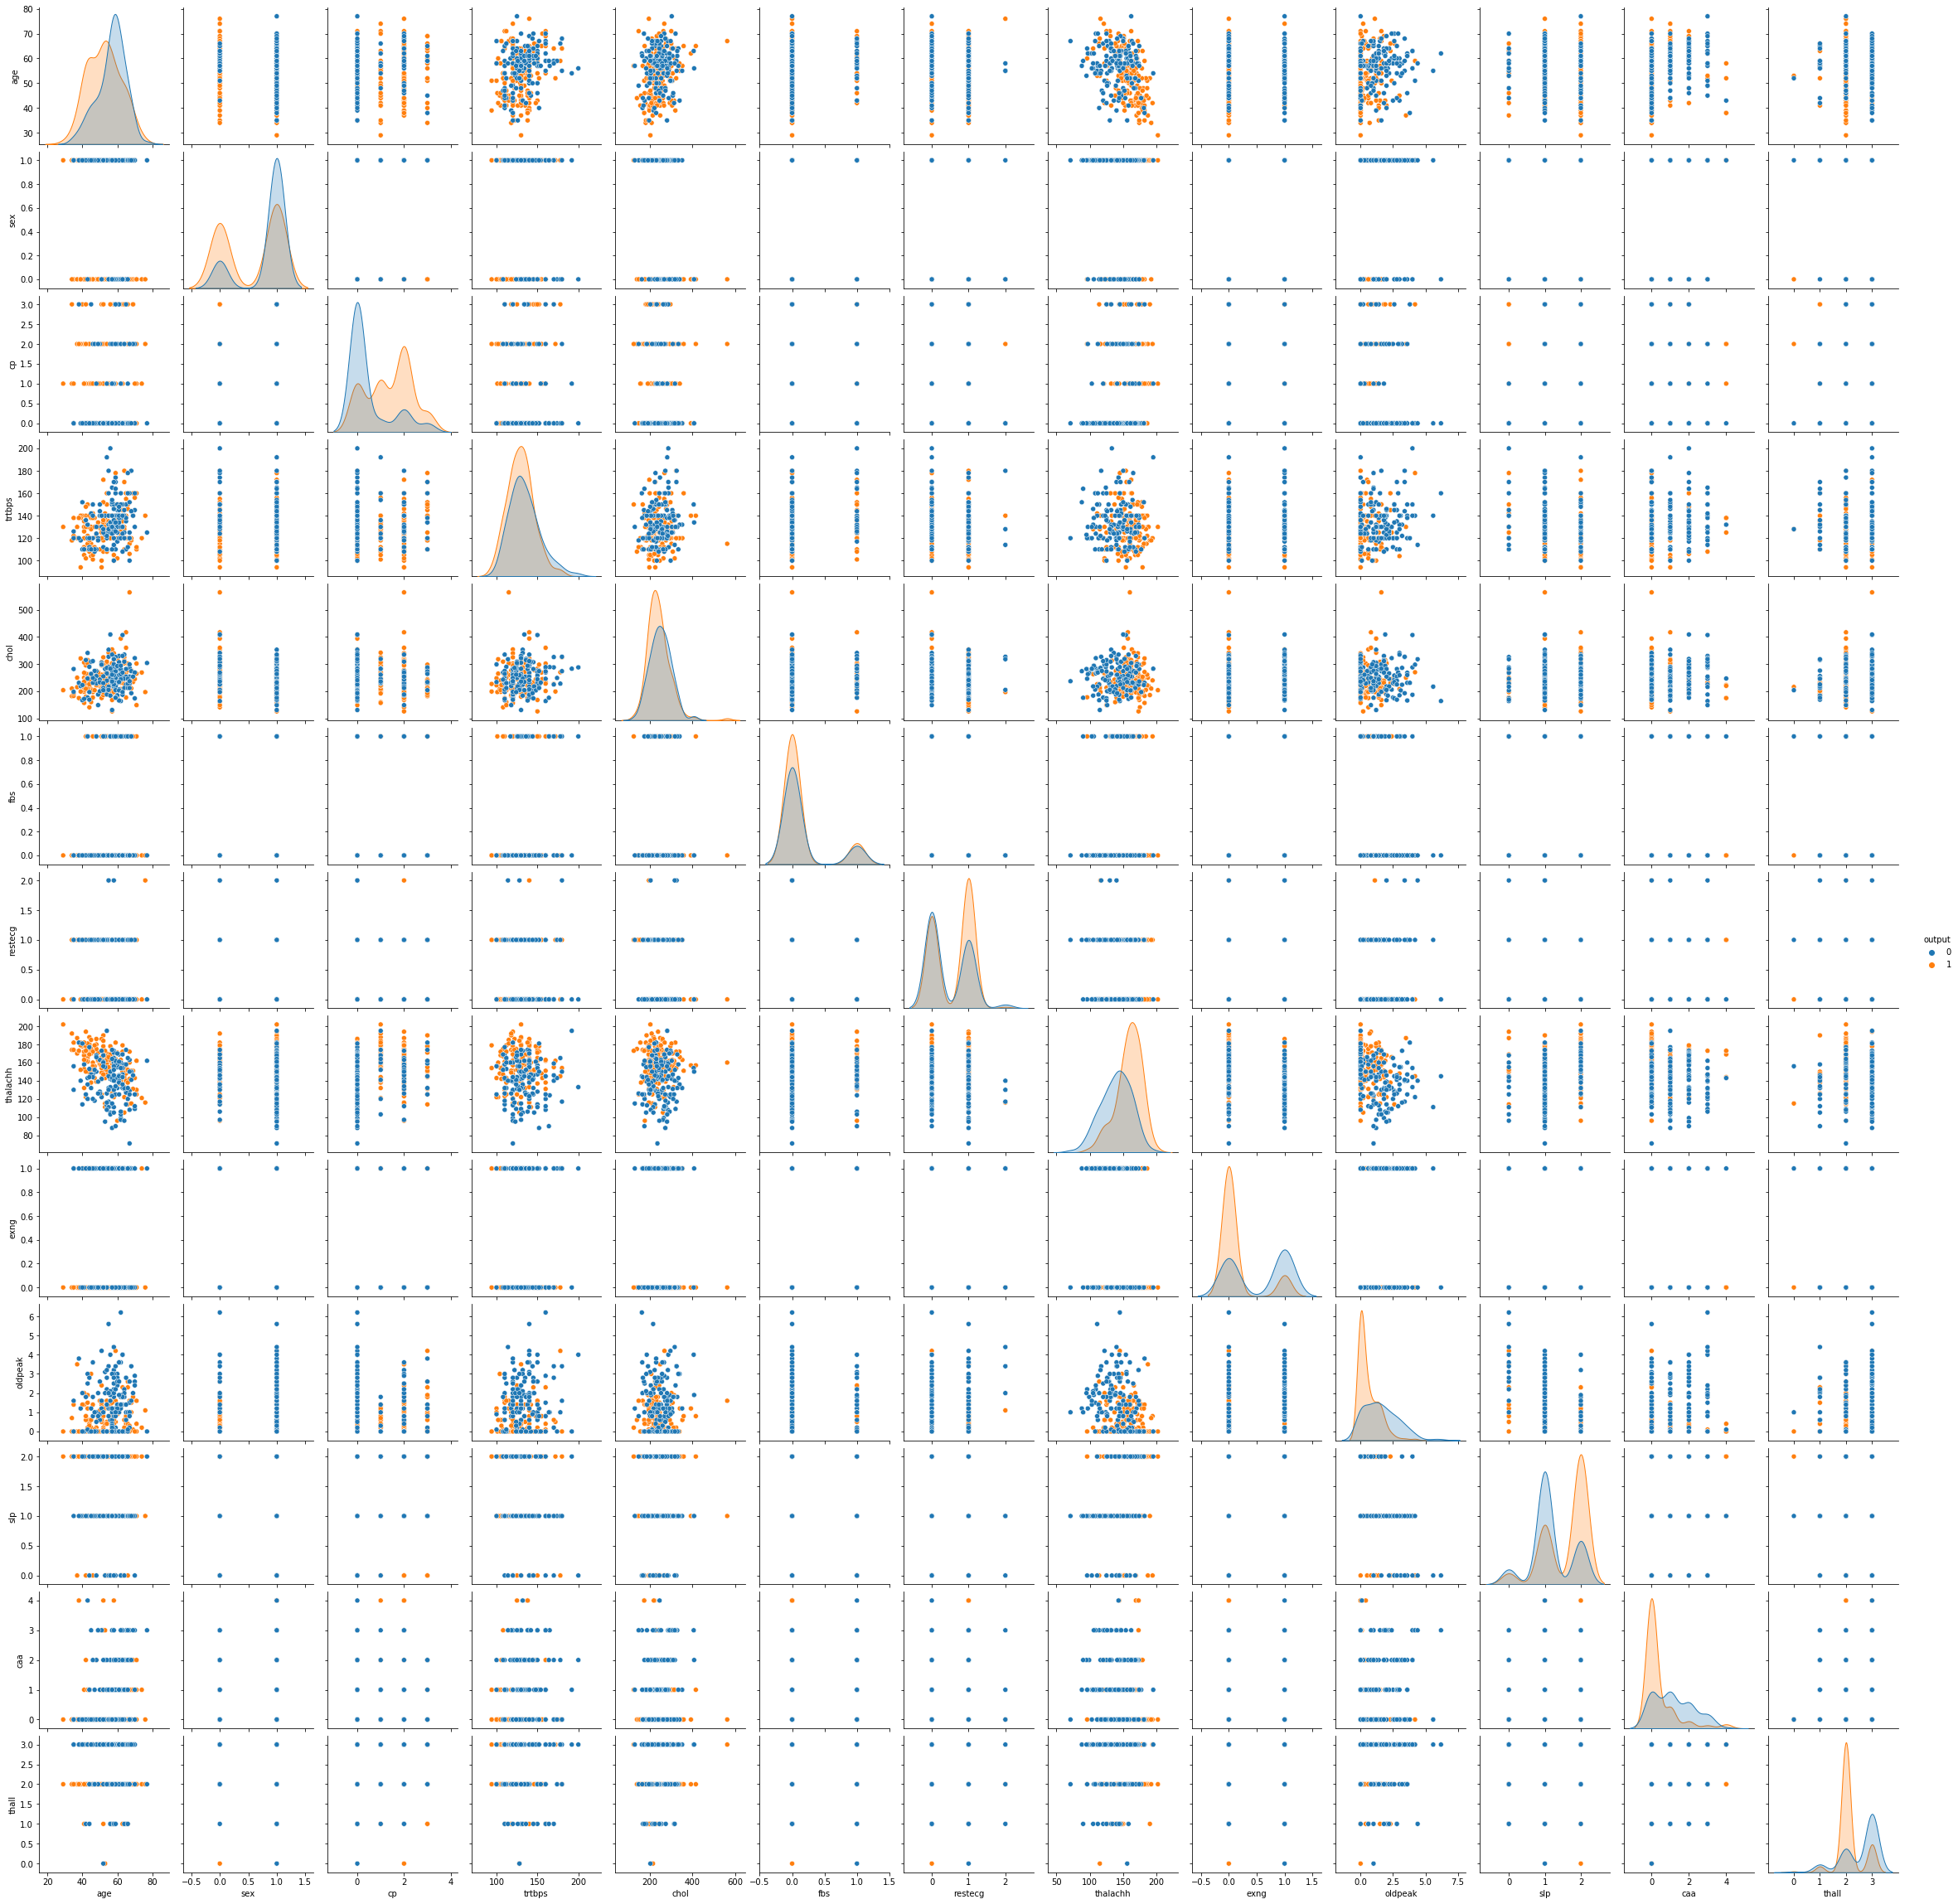

In [4]:
sns.pairplot(df, hue='output')
plt.show()

## Train the model

In [5]:
X = df.iloc[:, :-1]
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [7]:
y_train.head()

287    0
282    0
197    0
158    1
164    1
Name: output, dtype: int64

In [8]:
# first try k = 5
knn_model = KNeighborsClassifier(n_neighbors = 5) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):4


## Test the model

In [9]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [10]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [11]:
accuracy_score(y_test, y_pred)

0.6973684210526315

## Confusion Matrix

In [12]:
confusion_matrix(y_test, y_pred)

array([[22, 13],
       [10, 31]], dtype=int64)

## Explore on different K values

In [13]:
k_arr = np.arange(1, 55, 2)
ac_arr = []

for k in k_arr:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    ac_arr.append(ac)
    
df1 = pd.DataFrame({"K Value": k_arr, "Accuracy Score": ac_arr})
df1

,K Value,Accuracy Score
0,1,0.605263
1,3,0.671053
2,5,0.697368
3,7,0.723684
4,9,0.710526
5,11,0.750000
6,13,0.710526
7,15,0.684211
8,17,0.723684
9,19,0.736842


In [14]:
#find max accuracy score and corresponding k values
max_value = df1['Accuracy Score'].max()
df1 [df1['Accuracy Score'] == max_value]

,K Value,Accuracy Score
5,11,0.75
11,23,0.75


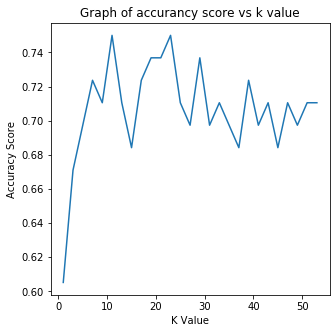

In [15]:
plt.figure(figsize=(5,5))
plt.plot(k_arr, ac_arr)
plt.title("Graph of accurancy score vs k value")
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.show()

## Train and test the model with the best K value

In [16]:
#best k value is 11
knn_model = KNeighborsClassifier(n_neighbors = 11) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):4


In [17]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [18]:
confusion_matrix(y_test, y_pred)

array([[23, 12],
       [ 7, 34]], dtype=int64)

## Predict values

In [19]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [20]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [21]:
start = int(round(time.time()*1000))
knn_model.predict(X_test)
end = int(round(time.time()*1000))
print("Time taken to predict(milliseconds):{0}".format(end-start))

Time taken to predict(milliseconds):4


## Part 2) After Data or Feature Engineering

## Data Engineering

In [22]:
#check any null in our data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [23]:
#check any duplicate in our data
df.duplicated().sum()

1

In [24]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [25]:
#check output balance
df['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

In [26]:
df.to_csv('heart_clean.csv', index=False)

## Train and test the model

In [27]:
df_clean = pd.read_csv('heart_clean.csv')

In [28]:
df_clean.shape

(302, 14)

In [29]:
X = df_clean.iloc[:, 0:13]
y = df_clean['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [30]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
286,57,1,1,154,232,0,0,164,0,0.0,2,1,2
281,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,62,1,0,120,267,0,1,99,1,1.8,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2


In [31]:
y_train.head()

286    0
281    0
197    0
158    1
164    0
Name: output, dtype: int64

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):4


In [33]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6973684210526315

In [34]:
confusion_matrix(y_test, y_pred)

array([[20, 15],
       [ 8, 33]], dtype=int64)

## Find suitable K value to train and test the model

In [35]:
k_arr = np.arange(1, 55, 2)
ac_arr = []

for k in k_arr:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    ac_arr.append(ac)
    
df1 = pd.DataFrame({"K Value": k_arr, "Accuracy Score": ac_arr})
df1

,K Value,Accuracy Score
0,1,0.539474
1,3,0.671053
2,5,0.684211
3,7,0.710526
4,9,0.684211
5,11,0.697368
6,13,0.671053
7,15,0.697368
8,17,0.657895
9,19,0.671053


In [36]:
max_value = df1['Accuracy Score'].max()
df1 [df1['Accuracy Score'] == max_value]

,K Value,Accuracy Score
25,51,0.75
26,53,0.75


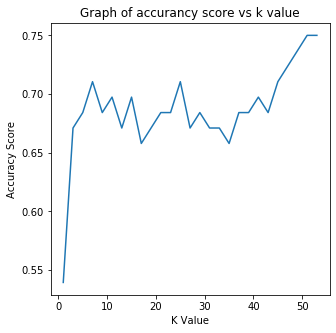

In [37]:
plt.figure(figsize=(5,5))
plt.plot(k_arr, ac_arr)
plt.title("Graph of accurancy score vs k value")
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.show()

In [38]:
#best k value after data engineering is 51
knn_model = KNeighborsClassifier(n_neighbors = 51) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):0


In [39]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [40]:
confusion_matrix(y_test, y_pred)

array([[20, 15],
       [ 4, 37]], dtype=int64)

## Feature Engineering - Feature Selection

In [41]:
corr_mat = df.corr()
corr_mat

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


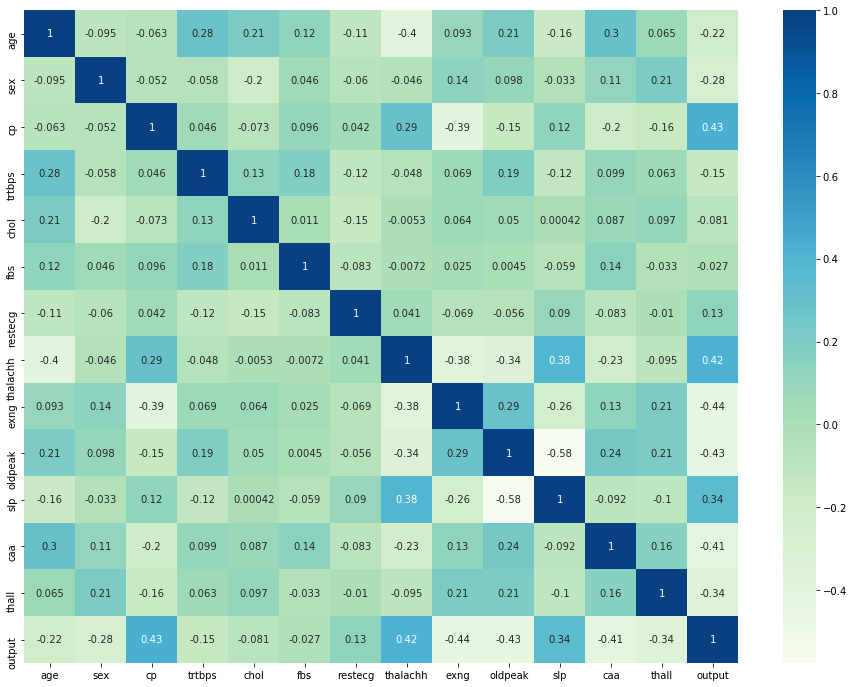

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.show()

In [43]:
target = 'output'
candidates = corr_mat[target][(corr_mat[target] >= 0.3) | (corr_mat[target] <= -0.3)]
candidates

cp          0.432080
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64

In [44]:
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'mpg' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'mpg'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'mpg'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Selected Features =', accept)

Selected Features = ['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


## Train and test the model with feature selection

In [45]:
df_new = df_clean[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall','output']]
df_new.head()

,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1


In [46]:
X = df_new.iloc[:,:-1]
y = df_new['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
k_arr = np.arange(1, 55, 2)
ac_arr = []

for k in k_arr:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    ac_arr.append(ac)
    
df1 = pd.DataFrame({"K Value": k_arr, "Accuracy Score": ac_arr})
df1

,K Value,Accuracy Score
0,1,0.684211
1,3,0.750000
2,5,0.763158
3,7,0.684211
4,9,0.710526
5,11,0.671053
6,13,0.710526
7,15,0.710526
8,17,0.710526
9,19,0.723684


In [48]:
max_value = df1['Accuracy Score'].max()
df1 [df1['Accuracy Score'] == max_value]

,K Value,Accuracy Score
2,5,0.763158


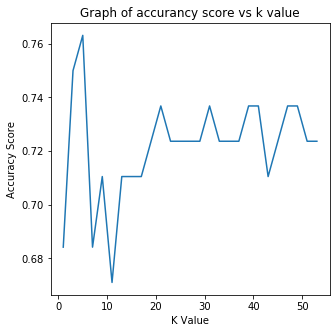

In [49]:
plt.figure(figsize=(5,5))
plt.plot(k_arr, ac_arr)
plt.title("Graph of accurancy score vs k value")
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.show()

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 5) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):0


In [51]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7631578947368421

In [52]:
confusion_matrix(y_test, y_pred)

array([[24, 11],
       [ 7, 34]], dtype=int64)

## Feature Engineering - Feature Extraction

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
df_clean = pd.read_csv('heart_clean.csv')

x = df_clean.iloc[:, 0:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [55]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [56]:
#find the suitable number of new features
n_com = np.arange(2, 13)
k_arr = np.arange(1, 55, 2)
vs_arr = []
best_ac_arr = []
best_k_arr = []

for n in n_com:
    pca = PCA(n_components=n)
    pc = pca.fit_transform(x_scaled)
    df_new = pd.DataFrame(pc)
    X = df_new
    y = df_clean['output']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    ac_arr = []
    
    for k in k_arr:
        knn_ex = KNeighborsClassifier(n_neighbors = k)
        knn_ex.fit(X_train, y_train)
        ac = accuracy_score(y_test, knn_ex.predict(X_test))
        ac_arr.append(ac)
    
    df1 = pd.DataFrame({"K Value": k_arr, "Accuracy Score": ac_arr})
    max_value = df1['Accuracy Score'].max()
    Best_K = df1 [df1['Accuracy Score'] == max_value]
    vs_arr.append(pca.explained_variance_ratio_.sum())
    best_ac_arr.append(max_value)
    best_k_arr.append(Best_K.iloc[0,0])

df2 = pd.DataFrame(
    {"N Components": n_com,
     "Variance Sum": vs_arr,
     "Best Accuracy Score": best_ac_arr,
     "Best K Value": best_k_arr})
df2

,N Components,Variance Sum,Best Accuracy Score,Best K Value
0,2,0.331730,0.881579,13
1,3,0.425328,0.881579,47
2,4,0.516539,0.881579,47
3,5,0.595242,0.881579,9
4,6,0.669802,0.868421,9
5,7,0.736344,0.894737,11
6,8,0.796308,0.921053,9
7,9,0.850633,0.907895,7
8,10,0.898512,0.907895,11
9,11,0.938964,0.921053,13


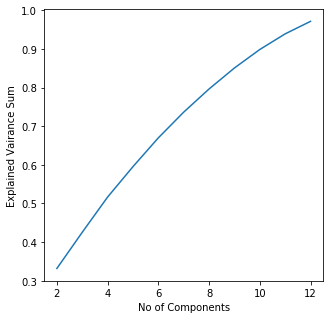

In [57]:
plt.figure(figsize=(5,5))
plt.plot(n_com, vs_arr)
plt.xlabel("No of Components")
plt.ylabel("Explained Vairance Sum")
plt.show()

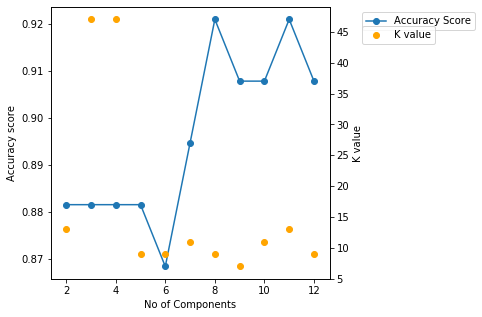

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(n_com, best_ac_arr, marker="o", label="Accuracy Score")
ax2 = ax.twinx()
ax2.scatter(n_com, best_k_arr, color="orange", label="K value")
ax.set_xlabel("No of Components")
ax.set_ylabel("Accuracy score")
ax2.set_ylabel("K value")
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.1, 0.95), loc='upper left')
plt.show()

## Train and test the model with suitable new features and K value

In [59]:
#suitable new features is 11 
pca = PCA(n_components=11)
pc = pca.fit_transform(x_scaled)

df_new = pd.DataFrame(pc)

X = df_new
y = df_clean['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [60]:
#suitable k value is 13
knn_model = KNeighborsClassifier(n_neighbors = 13) 

start = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end = int(round(time.time()*1000))
print("Time taken to train(milliseconds):{0}".format(end-start))

Time taken to train(milliseconds):0


In [61]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [62]:
confusion_matrix(y_test, y_pred)

array([[32,  3],
       [ 3, 38]], dtype=int64)

## Predict Values

In [63]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [65]:
start = int(round(time.time()*1000))
knn_model.predict(X_test)
end = int(round(time.time()*1000))
print("Time taken to predict(milliseconds):{0}".format(end-start))

Time taken to predict(milliseconds):6
